## Supervised Machine Learning - Example 01
# Feature Classification


_"A pattern recognition technique that is used to categorize data into different classes."_

This example uses **Scikit-learn** (http://scikit-learn.org/).

**Scikit-learn** is an open-source machine learning library for Python that offers a variety of regression, classification and clustering algorithms.


## Objective:
* To automatically flag phishing messages using selected features (individual measurable properties) of an e-mail corpus.

### Input data:

**Origin:**
* emails-enron-features.csv: Regular, non-phishy emails from the Enron email corpus;
* emails-phishing-features.csv: Phishing email corpus.

<i>Both files were created using a custom fork of: https://github.com/diegoocampoh/MachineLearningPhishing</i>

**Features description:**
* Html Form: (boolean) True if the e-mail contains HTML forms;
* Number of Attachments: (numerical) Number of attachments present in the e-mail;
* Flash content: (boolean) True if flash content detected in the body of the email;
* Html iFrame: (boolean) True if HTML iFrames detected;
* HTML content: (boolean) True if HTML content detected;
* URLs: (numerical) Number of URLS in the email;
* External Resources: (numerical) Number of external resources linked in e-mails body;
* Javascript: (numerical) Number of Javascript blocks inside the email’s body;
* Css: (numerical) Number of Css links in the e-mails body, under the head tag in the html message;
* IPs in URLs: (boolean): True if detected IPs in URLS, instead of human-readable domain names;
* @ in URLs: (boolean) True if there is the '@' character in URLs;
* Encoding: (text): Message encoding.

**Label**
* Phishy: (boolean) True if from the phishing e-mail corpus.

## Summary:

1. [Import and Load](#p1)
2. [Data Exploration](#p2)
3. [Prepare the Data Set](#p3)
4. [Train and Test](#p4)
5. [Exercise](#p5)
6. [Export](#p6)

<a id="p1"></a>
## 1. Import and Load

The data set is a concatenation of two [CSV](https://en.wikipedia.org/wiki/Comma-separated_values) files created from the [Enron email corpus](https://www.cs.cmu.edu/~enron/) and an available [phishing corpus](http://monkey.org/%7Ejose/wiki/doku.php?id=PhishingCorpus).

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.concat(map(pd.read_csv, 
                   ['data/emails-enron-features.csv', 
                    'data/emails-phishing-features.csv']))
df.head()

,Html Form,Attachments,Flash content,Html iFrame,HTML content,URLs,External Resources,Javascript,Css,IPs in URLs,@ in URLs,Encoding,Phishy
0,False,0,False,False,True,0,0,0,0,False,False,7bit,False
1,False,0,False,False,True,0,0,0,0,False,False,7bit,False
2,False,0,False,False,True,0,0,0,0,False,False,7bit,False
3,False,0,False,False,True,0,0,0,0,False,False,7bit,False
4,False,0,False,False,True,0,0,0,0,False,False,quoted-printable,False


<a id="p2"></a>
## 2. Data Exploration

Initial step in data analysis, where we explore a large data set in an unstructured way to uncover initial patterns, characteristics  and points of interest.

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.shape

(4000, 13)

### Check for missing values

Missing data can reduce the statistical power of a study and can produce biased estimates, leading to invalid conclusions ([Why are missing values a problem?](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3668100/))

In [5]:
df.isnull().sum()

Html Form             0
Attachments           0
Flash content         0
Html iFrame           0
HTML content          0
URLs                  0
External Resources    0
Javascript            0
Css                   0
IPs in URLs           0
@ in URLs             0
Encoding              0
Phishy                0
dtype: int64

### Take a quick look at the *Phishy* label column:

In [6]:
df['Phishy'].unique()

array([False,  True])

In [7]:
df['Phishy'].value_counts()

False    2000
True     2000
Name: Phishy, dtype: int64

We can see that we have a [balanced dataset](https://medium.com/analytics-vidhya/what-is-balance-and-imbalance-dataset-89e8d7f46bc5): 2000 out of 4000 e-mails (50%) are _Phishy_.

This means that any machine learning model we create has to perform **better than 50%** to beat random chance.

### Check the features' column types

In [8]:
df.dtypes

Html Form               bool
Attachments            int64
Flash content           bool
Html iFrame             bool
HTML content            bool
URLs                   int64
External Resources     int64
Javascript             int64
Css                    int64
IPs in URLs             bool
@ in URLs               bool
Encoding              object
Phishy                  bool
dtype: object

### Explore and select features

[Feature Selection](https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e) is one of the core concepts in machine learning, which hugely impacts the performance of your model. The data features that you use to train your ML models have a huge influence on the performance you can achieve.

In [9]:
df[df['Phishy']==False]['URLs'].describe()

count    2000.000000
mean        1.314000
std         8.237192
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       112.000000
Name: URLs, dtype: float64

In [10]:
df[df['Phishy']==True]['URLs'].describe()

count    2000.000000
mean       10.717500
std        15.601936
min         0.000000
25%         2.000000
50%         4.000000
75%        11.000000
max        83.000000
Name: URLs, dtype: float64

<a id="p3"></a>
## 3. Prepare the Data Set

### Create Feature and Label sets

**Feature** columns are the ones used to predict the **label** columns.

By **convention**, Features are represented as **X** (uppercase) and Labels as **y** (lowercase).

In [11]:
X = df[['Html Form','Attachments','Flash content','URLs','External Resources','Javascript']]
y = df['Phishy']

### Split the data into train and test sets

Here we'll assign 70% of the data for training and 30% for testing.

Also, we are setting a `random_state` seed value to ensure results replicability.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print('Training Data Shape:', X_train.shape)
print('Testing Data Shape: ', X_test.shape)

Training Data Shape: (2800, 6)
Testing Data Shape:  (1200, 6)


<a id="p4"></a>
## 4. Train and Test

We will try different [classification algorithms](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) and compare their results.

### Decision Tree

A supervised learning method that learns simple decision rules inferred from the data features and predicts the value of a target variable.

It can be simplified as a set of if-then-else decision rules modeled in a tree structure, where the **leaves** represent class labels and branches represent **conjunctions** of features that lead to those class labels.

In [13]:
# Import
from sklearn.tree import DecisionTreeClassifier

# Create 
dtc = DecisionTreeClassifier(random_state=42, max_depth=6)

# Train
dtc = dtc.fit(X_train, y_train)

Model classes: [False  True]


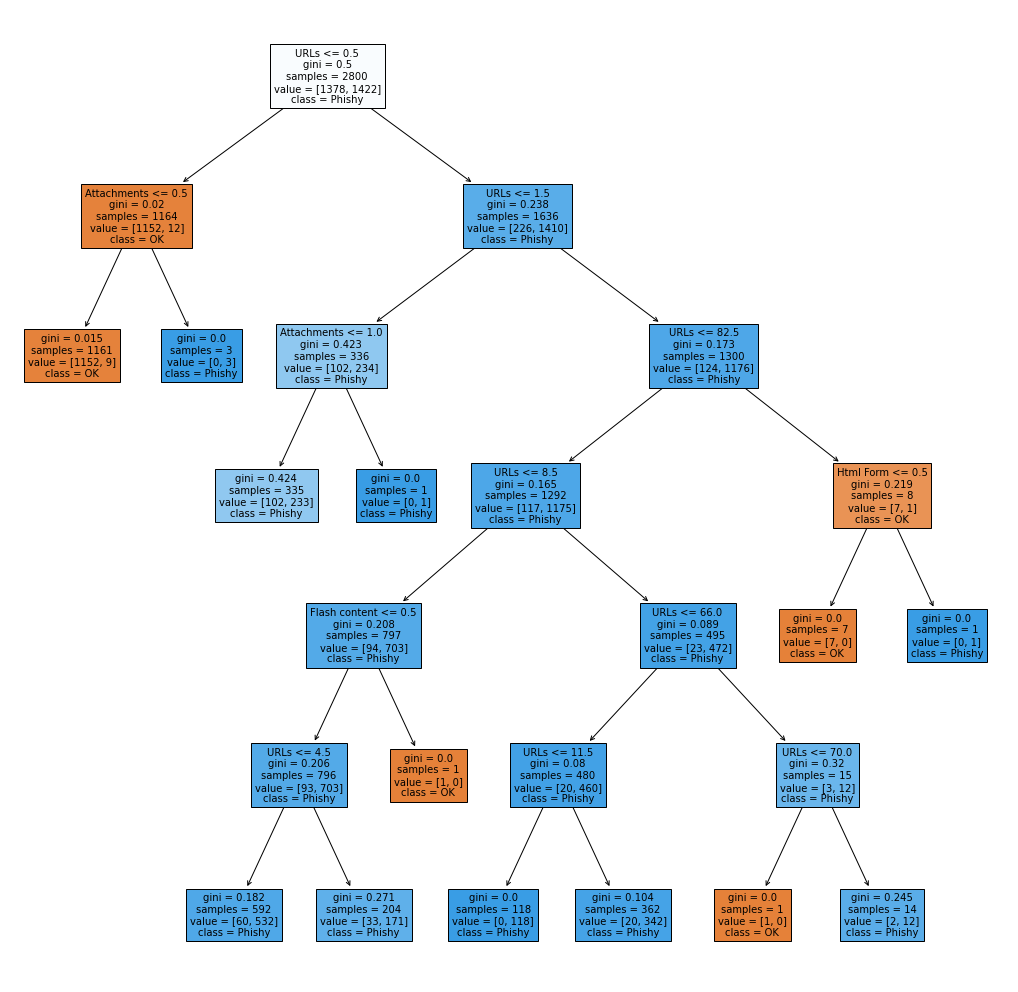

In [14]:
# Plot

# Define plot labels
print(f'Model classes: {dtc.classes_}')

classes = ['OK', 'Phishy']
features = X.columns

# Configure plot figure
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(18,18)) 
plot_tree(dtc, filled=True, fontsize=10, 
          feature_names=features, 
          class_names=classes);


# Export as PNG (current dir)
plt.savefig('dtc_plt', dpi=100)

# Plot
plt.show()

**Check the model's accuracy:**

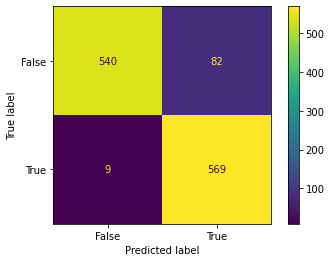

In [15]:
# Create a prediction set
predictions = dtc.predict(X_test)

# Print a confusion matrix
cm = metrics.confusion_matrix(y_test, predictions, labels=dtc.classes_)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc.classes_)
disp.plot()

In [16]:
# Classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       0.98      0.87      0.92       622
        True       0.87      0.98      0.93       578

    accuracy                           0.92      1200
   macro avg       0.93      0.93      0.92      1200
weighted avg       0.93      0.92      0.92      1200



In [17]:
# Overall accuracy
print(metrics.accuracy_score(y_test, predictions))

0.9241666666666667


<a id="p5"></a>
## 5. Exercise

Try a different [classification algorithm](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

In [18]:
# Import
...

# Create 
...

# Train
...

In [19]:
# Create a prediction set
...

# Print a confusion matrix
...

In [20]:
# Classification report
...

In [21]:
# Overall accuracy
...

<a id="p6"></a>
## 6. Export

If needed, you can export a trained model and use it in a different application.

In [22]:
# Select the desired model
model = dtc

In [23]:
import joblib

# Save to file in the current working directory
joblib_file = "phishing_detection_mlmodel.pkl"
joblib.dump(model, joblib_file)

['phishing_detection_mlmodel.pkl']

### Trained model reuse (import) example

In [24]:
# Load from file
joblib_file = "phishing_detection_mlmodel.pkl"
joblib_model = joblib.load(joblib_file)

In [25]:
# Calculate the accuracy and predictions
score = joblib_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))

Test score: 92.42 %


In [26]:
# Prediction test
y_predict = joblib_model.predict(X_test)
y_predict

array([False,  True, False, ..., False, False,  True])